## Elguja Dadunashvili: Machine-Learning-Verfahren zur Automatisierung der Arbeitsmethode der typologisch-vergleichenden Märchenforschung - Teil 1
##### Datum: 26.02.2022

ვნებათაღელვის უსასრულობისა და შეცნობილი აუცილებლობისაკენ! მიდით, ერთაოს! (aus dem Film "Schrekilebi")

### Modul für die Aggregation des Korpus von Trainingsdaten 

[Zelle # 1]

1-2: Die Variable 'repert' gilt für die gezielte Auswahl der  in dem Trainingdatenrepositorium angelegte Texte aus vorbestimmten  Herkunftsrepertoires. Die Variable kann mit einem oder mehreren werten ausgefült werden z.B. ['deu','kat'] oder auch leer bleiben z.B. ['']. Variable 'typNum' gilt für die gezielte Zugriff auf einen Typ innerhalb der ausgewählten Repertoires. Auch diese Variable darf leer bleiben. 

3-8: Jedes Mal bei der Aggregation des Korpus von Trainingsdaten wird der gleichnamige alte Korpus gelöscht.

In [21]:
repert=['']
typNum='300_'
def entfernen(var):
    import os
    if os.path.exists(var):
        os.remove(var)
entfernen('episode_binar_train.csv')

[Zelle # 2]

1-61: Aggregation der Datei 'episode_temp_train.csv' (eine Funktion). Die im Ordner „Trainingsdaten“ angelegte TXT Dateien werden in der CSV Datei aggregiert und in das root Repositorium verlegt. 

62-68: Umwandlung 'episode_temp_train.csv' in die Datei 'episode_string_train.csv'.

69-74: 'episode_string_train.csv' laden, von den überflüssigen Zeichen bereinigen und ins Trainingsdatenkorpus 'episode_binar_train.csv' umwandeln.

75-76: Unnotige Aggregationen werden gelöscht.

In [22]:
def aggreg():
    import glob
    def word_to_lex(word):
        ret=(word) 
        return ret
    def write_back(words):
        with open(temp, "a", encoding='utf-8') as output:      
            for word in words:
                as_lex = word_to_lex(word[0])
                full_word = '"' + as_lex + '"'
                for sub_word in word[1:]:
                    full_word += " , "  '"' + sub_word + '"'
                full_word +="\n"
                output.write(full_word)
    def clean(line):
        line = line.replace("\n"," ").strip()
        line = line.replace("ä","ae").replace("ü","ue").replace("ö","oe")
        line = line.replace("ß","ss").replace(",","").replace("«","")
        line = line.replace("»","").replace(".","").replace(":","")
        line = line.replace(";","").replace('"',"")
        line = line.replace("?","").replace("!","").replace("á","a")
        line = line.replace(",","").replace("\t"," ").replace("'","")
        line = line.replace("‹","").replace("›","").replace("-"," ")
        line = line.replace("'('","").replace("')'","").replace('>','')
        line = line.replace("    "," ").replace("   "," ").replace("  "," ")
        line = line.replace('–','').replace('—','').replace('<','')
        line = line.replace("Â", "A").replace("ø", "oe").replace('“','')
        line = line.replace('„','').replace('(','').replace(')','')
        line = line.replace("‚", "").replace(']','').replace('[','')
        if line == "": 
            return
        line=line.split("|")
        line[0]=line[0].split("|")[0]
        for i, _ in enumerate(line):
            if (i !=0) and (i!=2):
                line[i]=line[i].lower()
        flex=[]
        try:
            flex=line[1].split("")
        except:
            pass
        value=str(line)
        line=str(line)   
        flex.append(line)
        ret=[]
        for i in flex:
            ret.append((i,value[0]))
        return ret
    with open(temp, "w", encoding='utf-8') as output:
        output.write ("quelle,episode,index_string,index_binar\n")
    pairs = []
    for file in glob.glob(ordner):
        for an in repert:
            if an in file and typNum in file:
                with open(file, 'r', encoding='utf-8', errors='ignore') as episode:
                    for line in episode.readlines():
                        clean_words = clean(line)
                        pairs = pairs + clean_words
    write_back(pairs)
temp = "episode_temp_train.csv"
ordner = "Trainingsdaten/*.txt"
aggreg()
fin = open('episode_temp_train.csv','r', encoding ='utf-8')
fout = open('episode_string_train.csv', "wt", encoding ='utf-8')
for kfz in fin:
    fout.write(kfz.replace(', "["',"").replace('"[', "").replace(']"',"")
               .replace("', '", "','").replace(" '", "'"))
fin.close()
fout.close()
fin = open('episode_string_train.csv','r', encoding='utf-8') 
fout = open('episode_binar_train.csv', "wt", encoding='utf-8')
for efz in fin:
    fout.write(efz.replace("'",""))             
fin.close()
fout.close()
entfernen('episode_temp_train.csv')
entfernen('episode_string_train.csv')

###  Herstellung des Modells und der prototypischen Metaepisode 

[Zelle # 3]

1-5: Trainingdatenkorpus zugreiffen und der im Datenfeld 'index_string' eingetragene Merkmalen mitsamt der Vorkommenshäufigkeitsrate einbelden.

In [23]:
import pandas as pd
from collections import Counter
df = pd.read_csv('episode_binar_train.csv',  encoding='utf-8')
indexliste=Counter(df.index_string)
print(indexliste, sep='\n')

Counter({'e300_e_vorfeld_des_kampfes_bis_zum_sieg': 41, 'e300_c_anfangssituation_ankunft_und_erkundigung_der_not': 36, 'e300_o_auftritt_des_HD_vor_dem_AG_bis_zur_erkennung_seiner_heldentat': 34, 'e300_g_nach_dem_sieg_bis_zur_trennung_des_HD_und_des_OB': 29, 'e300_k_misshandlung_des_FH_bis_zur_hochzeitstag': 27, 'e300_m_rueckkehr_des_HD_und_erkundung_ueber_die_hochzeit_bis_zum_wiedergewinn_der_aufmerksamkeit': 18, 'e303_c_eingangssituation_bis_zur_trennung': 18, 'eUNDF_a_': 16, 'e303_g_erstes_treffen_mit_dem_AN': 16, 'e303_i_vom_erkundigung_der_not_bis_zum_aufbruch_des_HF_zum_AN': 15, 'e303_k_vom_aufbruch_zum_AN_bis_zur_seiner_ueberweltigung': 15, 'e554_e_leistung_des_HD_gegenueber_dem_tier_und_aussprechen_der_dankbarkeit': 12, 'e315_a_': 12, 'eCoM_c_conceptia_magica': 11, 'e300_l_wiederbelebung_des_HD': 9, 'e300_i_rueckkehr_des_OB_und_die_suche_nach_dem_HD': 7, 'e300_q_von_der_begegnung_mit_dem_vogel_bis_zum_ende_des_fluges': 7, 'e550_a_': 7, 'e303_m_eifersucht': 5, 'e328_a_': 4, 'e303

[Zelle # 4]

1: In den obeneingeblendete Merkmalen eine Episode Kopieren und hier als Wert der Variable 'gesep' einfügen. 

In [12]:
gesep = 'e300_c_anfangssituation_ankunft_und_erkundigung_der_not'

[Zelle # 5]

1-6: In Trainingsdaten die gesuchte Episode ('gesep') mit Einsen (1), den Rest mit Nullen (0) etikettieren und die Änderung speichern.

In [5]:
for i, gesuchte_episode in enumerate(df.index_string):
    if (gesuchte_episode == gesep):
        df.index_binar[i]='1'
    else: 
            df.index_binar[i]='0'
df.to_csv('episode_binar_train.csv', encoding='utf-8', index=False)

[Zelle # 6]

1-4: Im Trainingsdatenkorpus die Datenfelder für Probetexte (X_train) und für die Merkmalen (y_train) bestimmen und die Bilanz zwischen negativ (0) und positiv (1) etikettierten Datensätzen betrachten ( s. Counter).

In [6]:
X_train=(df['episode'])
y_train=(df['index_binar'])
indexliste=Counter(df.index_binar)
print(indexliste, sep='\n')

Counter({'0': 642, '1': 37})


[Zelle # 7]

1: Die in die eckige Klammern eingetragene Wörter werden in die vorhandene Stopwörter-Liste: eingefügt. Einzelnes Wort muss dabei mit Anführungszeichen umgeschlossen und von andren Wörter durch das Komma getrennt werden, ein Beispiel: ['mein','dein']. 

2-6: Datenfeld 'episode' von konwentionelen und von uns eingegebenen Stoppwörter bereinigen. 

In [7]:
custom_stop_word_list=[]
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
NLTK_stop_words_list=stopwords.words('german')
de = custom_stop_word_list + NLTK_stop_words_list

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elguj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[Zelle # 8]

1-8: Einrichtung einer sciki-learn Pipeline mit Klassen LogisticRegression, TfidVectorizer und GridSearchCV. 

9-10: Modell auswerten (s. Bester Score aus der Kreuzvalidierung:).

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=2, stop_words=de, ngram_range=(1,1), norm=None), 
                     LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}     
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Bester Score aus der Kreuzvalidierung: {:.2f}".format(grid.best_score_))

Bester Score aus der Kreuzvalidierung: 0.96


[Zelle # 9]

1-6: Aus dem Modell die Liste der positiven und negativen Merkmalen extrachieren, Zahl der Merkmalen einblenden (s. Gesamte Anzahl der Wörter:).

In [9]:
import numpy as np
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
max_value = vectorizer.transform(X_train).max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())
print("Gesamte Anzahl der Wörter: {}".format(len(vectorizer.vocabulary_)))

Gesamte Anzahl der Wörter: 5185


[Zelle # 10]

1-7: Merkmalen mit höchsten Koeffizienten visualisieren (blau=positiv, rot=negativ). Variable 's_zahl' stellt fest wieviel Merkmalen von beiden Kategorien eingeblendet werden muss. 

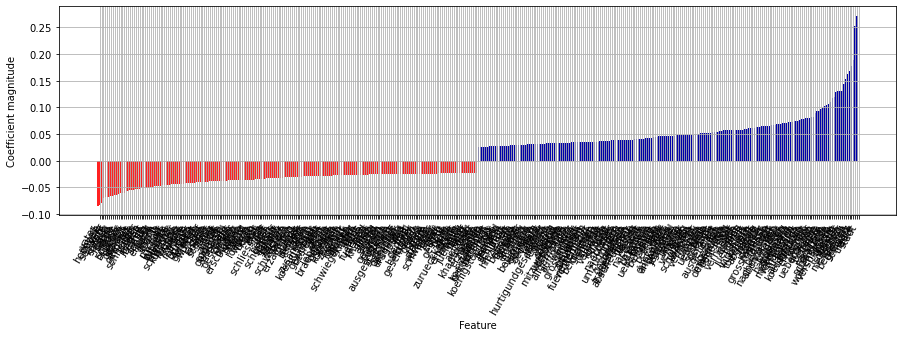

In [10]:
s_zahl = 200
import matplotlib.pyplot as plt
import mglearn
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names,  n_top_features=s_zahl)
plt.grid()

[Zelle # 11]

1-5: Anpassung zwischen minimaler und maximaler Koeffizienten für die Merkmalen. Je nach der Episode kann die Kurve der expotentielle Abnahme unterschiedlich sein, dementsprechend entscheidet man für größere oder kleinere Zahl der relevante Merkmale. Diese wird durch die Variable 'n_zahl' einegstellt.

6-7: Visualisierung der ausgewählten Merkmalen. 

In [11]:
n_zahl = 32
gio=(grid.best_estimator_.named_steps["logisticregression"].coef_[0])
n_top=np.argsort(gio)
text_pos=feature_names[n_top[-n_zahl:]]
text_neg=feature_names[n_top[0:n_zahl]]
print("Positive Merkmale:\n{}".format(text_pos))
print ("Negative Merkmale:\n{}".format(text_neg))

Positive Merkmale:
['koenigs' 'alljaehrlich' 'koenigreichs' 'fuettern' 'erloesest' 'kommt'
 'darum' 'flor' 'uebergeben' 'erloesen' 'befreien' 'fragte' 'grade'
 'naechste' 'drachen' 'schwarzem' 'leute' 'wolkensaeule' 'versprochen'
 'drache' 'warum' 'macht' 'schuster' 'menschen' 'tochter' 'traurig'
 'behangen' 'gelesen' 'schwarz' 'reihe' 'trauer' 'stadt']
Negative Merkmale:
['vater' 'hochzeit' 'freude' 'schwert' 'kopf' 'koepfe' 'sprach' 'pferd'
 'baum' 'erde' 'sagte' 'schloss' 'brueder' 'ueber' 'beiden' 'geputzt'
 'schoen' 'heraus' 'getoetet' 'sah' 'schneider' 'jaeger' 'liess' 'jungen'
 'befreit' 'nahm' 'ab' 'schlug' 'erloest' 'hund' 'leben' 'gleich']


[Zelle # 12]

1-17: Bestimmte Merkmale in die neue txt Datei speichern(1-7) gesamte Information durch die Datenfelder strukturieren (8-12) und  nach dem Löschen der alten Datei (13) in Messdatenordner anlegen (14-17).

In [34]:
import csv 
import shutil, os
filename = '0_'+gesep
tit=(text_pos)
with open (filename+'.txt', 'wt', encoding='utf-8') as f:
    writer = csv.writer(f, delimiter=' ')
    writer.writerow(tit)
with open(filename+'.txt', 'r') as file:
    file_contents = file.read().replace("\n", "")
    frt_contents = filename+'|'+file_contents+'|0|0'
with open(filename+'.txt', 'wt', encoding='utf-8') as f:
        f.write(frt_contents)
entfernen('Messdaten/'+filename+'.txt')
import glob
files = glob.glob(filename+'.txt')
for f in files:
    shutil.move(f, 'Messdaten/')

###  Herstellung des Messdatenkorpus 

[Zelle # 13]

1-3: Die Variable 'tupNum', 'repert' und 'ausnahme' gelten für die Auswahl der in dem Messdatenrepositorium angelegte Texte mit dem konkretem Typ und dem Herkunftsrepertoire. Sowohl die Variable 'typNum' ails auch 'repert' kann mit leeren Anführungszeichen dargestellt werden. Für die Variable 'ausnahme' ist entweder ein unwahrscheinlicher Wert (z.B. 'xxyyzz') oder der Wert womit man eine bestimmte Gruppe von Daten aus der Wahl ausschließen kann eine Pflicht.

4: Der vorhandene Messdaten-Korpus löschen (falls vorhanden)

5-7: In dem Messdatenordner Messdaten parsen und einen 'episode_temp_mess.csv' Korpus aggregieren.

8-16: 'episode_temp_mess.csv' von den überflussigen Zeichen bereinigen und ins  Messdatenkorpus - 'episode_binar_mess.csv' umwandeln.

17-21: Datenfelder deklarieren und Datensätzen zählen (s. Counter), anschließend unnotige Temp-Aggregation löschen.

22-29: Messdatenkopus aus den Epsoden bestimmen und alle andere Datenfelder ignorieren

In [35]:
typNum=''
repert=''
ausnahme='xxyyzz'
entfernen('episode_binar_mess.csv')
temp = "episode_temp_mess.csv"
ordner = "Messdaten/*.txt"
aggreg()
from collections import Counter
fin = open("episode_temp_mess.csv",'r', encoding ='utf-8')
fout = open('episode_binar_mess.csv', "wt", encoding ='utf-8')
for efz in fin:
    fout.write(efz.replace(', "["',"").replace('"[', "")
               .replace(']"',"").replace("', '", "','")
               .replace(" '", "'").replace("'",""))   
fin.close()
fout.close()
df = pd.read_csv('episode_binar_mess.csv', encoding='utf-8')
from collections import Counter
indexliste=Counter(df.index_binar)
print(indexliste)
entfernen('episode_temp_mess.csv')
t_corpus = []
file = 'episode_binar_mess.csv'
with open(file, "r", encoding='utf-8') as maerchen:
    maerchen = df.episode
    reader = csv.reader(maerchen, delimiter = "|") 
    for row in reader:       
        lst = str(row)
        t_corpus.append(lst)

Counter({0: 87})


### Vorhersage durch LOGISTICREGRESSION

[Zelle # 14]

1-2: Vorhersage treffen.

3: Der synthetische Datensätzen wird ausgeschloßen. 

4: Jeder positiv bewerteter Datensatz wird extra eingebledet.

In [36]:
mod_pred=grid.predict(t_corpus)
for index in enumerate(mod_pred): 
    if '1' in (index) and index[0]>0:            
        print ('Positiv bewerteter Datensatz:{}'.format(index))

Positiv bewerteter Datensatz:(28, '1')


[Zelle # 15]

1-7: Alle probabilitische Vorheragen abruffen. Durch das Manipulieren der Variable 'pos>=' in der Zeile 6 wird der minimale Score angepasst.

In [37]:
all_pred=grid.predict_proba(t_corpus) 
sort_index=np.flip(all_pred[:,1].argsort())
for num_pos in sort_index:
    pos=all_pred[num_pos][1]
    for i,t_corpus_element in enumerate(t_corpus):
        if i==num_pos  and num_pos>0 and pos>=0.01:
            print(num_pos,'-', pos,'-', df.quelle[num_pos],'-', df.episode[num_pos],'\n')

28 - 0.8134217852598347 - mess_47 - dieser aber war in die stadt getreten wo er alles in bestuerzung und trauer fand alle fenster waren mit schwarzen tuechern verhangen er erkundigte sich daher was die ursache solcher trauer waere und erfuhr dass riesen in der naehe wohnten welche die stadt immer in angst und schrecken hielten und dass sieben drachen in einer nahen hoehle hausten welchen sie jeden tag einen menschen opfern muessten  und endlich sey eine schlange nicht weit auf einem baume welche alle menschen verzehre die ungluecklicher weise in ihr bereich kaemen niemand aber waere zu finden welcher die stadt von diesen ungeheuern befreyen wollte 

46 - 0.15096139844043072 - mess_48 - auf dem wege zu dieser kirche stand ein wirtshaus da hinein ging der soldat und logierte sich ein auf die nacht verlangte er zu trinken da sagte die wirtin das wasser in dem brunnen sei nicht gesund sie wolle ihm zitronenwasser geben sie aber gab ihm einen schlaftrunk er ging zwar hinaus setzte sich an d

###  Vorhersage durch die COSINE-SIMILARITY

[Zelle # 16]

1-14: Daten im Messdatenkorpus Vektorisieren, Transformieren und die Metrik für die Vorhersagefunktion definieren.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
vectorizer = TfidfVectorizer
vectorizers = vectorizer(analyzer='word', ngram_range=(1,1), 
                         min_df = 2, stop_words = de)
vokabular =  vectorizers.fit_transform(t_corpus)
metrik = cosine_similarity
def find_similar(vokabular, index, top_n =-1):   
    metriks = metrik(vokabular[index:index+1], vokabular).flatten()
    related_docs_indices = [i for i in metriks.argsort()[::-1] 
                            if i != index]
    return [(index, metriks[index]) for index 
            in related_docs_indices][0:top_n]

[Zelle # 17]

1-3: Gesuchte Episode (Zielepisode) einblenden. Die gesuchte Episode wird wird die 'n_te'-Variable bestimmt. Manuell eingepflegte Zielepisoden sollen deshalb immer in der ersten Reihen der Korpusdatensätzen stehen. Wir empfehlen deshalb, dass diese Daten mit dem Prefix '!_' + Kleinbuchstabe benannt wird.)

4: Synthetische Datei aus dem Messdatenordner entfernen.

In [39]:
n_te = 0
synt = t_corpus[n_te]
print(df.quelle[n_te],'-', synt)
entfernen('Messdaten/'+'0_'+gesep+'.txt')

0_e300_c_anfangssituation_ankunft_und_erkundigung_der_not - ['maedchen koenigreichs frassen muessten erloesest haeuschen darum ach flor uebergeben jungfrau erloesen naechste drache befreien leute menschen grade schwarzem fragte versprochen warum tochter schuster macht traurig behangen gelesen schwarz reihe trauer stadt']


[Zelle # 18]

1-3: Suchen starten und die Ergebnisse einblenden.

In [40]:
for index, score in (find_similar(vokabular, n_te)):
     if (df.index_string[index]==0 and index>0):
        print(index,'-', score,'-', df.quelle[index],'-', 
           t_corpus[index], '-',  df.index_binar[index],'-', df.index_binar[index],'\n' )

28 - 0.3065965494156473 - mess_47 - ['dieser aber war in die stadt getreten wo er alles in bestuerzung und trauer fand alle fenster waren mit schwarzen tuechern verhangen er erkundigte sich daher was die ursache solcher trauer waere und erfuhr dass riesen in der naehe wohnten welche die stadt immer in angst und schrecken hielten und dass sieben drachen in einer nahen hoehle hausten welchen sie jeden tag einen menschen opfern muessten  und endlich sey eine schlange nicht weit auf einem baume welche alle menschen verzehre die ungluecklicher weise in ihr bereich kaemen niemand aber waere zu finden welcher die stadt von diesen ungeheuern befreyen wollte'] - 0 - 0 

77 - 0.14616779991142445 - mess_46 - ['der junge mann aber beachtete den hinweis nicht weiter den ihm der koenig gegeben hatte und zog am naechsten tag los um alle leute zu befreien die die lamia gefangen hielt'] - 0 - 0 

66 - 0.1242124620587193 - mess_46 - [' ach mein kind wir haben hier kein wasser in dieser gegend hier lebt 

44 - 0.0 - mess_48 - ['die soldaten gingen nun wieder gegen ihre heimat zu und hielten alle tage ball es ging aber ihr geld doch zu ende da hielten sie rat und beschlossen wieder zum schlosse zu gehen und fuehrten den entschluss auch richtig aus als sie hinkamen war die fallbruecke wieder hinaufgezogen nachdem sie ein wenig dagestanden waren ging der verschlag die fallbruecke herunter sie gingen hinein zogen den tischkasten auf und taten die karten heraus als sie diese heraus getan hatten kam das alte maennlein wieder und sagte hab ich es euch nicht gesagt dass ihr nimmer kommen sollt jetzt muss einer da bleiben die drei soldaten losten untereinander und der den das los traf blieb da die anderen steckten soviel edelsteine ein als sie konnten und gingen auf die heimat zu zu dem der dableiben musste sagte das maennlein jetzt muesse er jahr und tag am falltor schildwache stehen die zeit vergehe ihm aber schnell sobald es ihn hungere sei sie herum das war richtig so als ihm der hunger kam 

[Zelle #19]

1-5: Analyse auf der exklusiven Textebene. Die Variable 'ziel' soll dem Wert des Datenfeldes 'quelle' entsprechen.

In [41]:
ziel = 'mess_48'
for index, score in (find_similar(vokabular, n_te)):  
    if ziel in df.quelle[index]:
        print([[index], score, df.quelle[index], 
               t_corpus[index]],df.index_string[index], df.index_binar[index],'\n' )

[[46], 0.10520980098805796, 'mess_48', "['auf dem wege zu dieser kirche stand ein wirtshaus da hinein ging der soldat und logierte sich ein auf die nacht verlangte er zu trinken da sagte die wirtin das wasser in dem brunnen sei nicht gesund sie wolle ihm zitronenwasser geben sie aber gab ihm einen schlaftrunk er ging zwar hinaus setzte sich an den weg schlief aber ein um 11 uhr kam die koenigstochter gefahren mit vier rappen und die chaise war schwarz behangen']"] 0 0 

[[47], 0.050316298846963134, 'mess_48', "['am zweiten tag ging der soldat wieder in das wirtshaus die wirtin machte es ihm gerade so wie das erstemal und gab ihm schlaftrunk er setzte sich darauf an die strasse und schlief wieder ein um 11 uhr kam die koenigstochter gefahren die chaise war mit vier fuchsen bespannt und rot behangen der soldat sah und hoerte aber nichts am dritten abend dachte er heute nacht komme ich doch mit er nahm den knecht mit hinaus dass dieser ihn wecke wenn er wieder schlafe die wirtin hatte ihn

### Ende 